# Intro

DKCOS had number one market share of Face Mask category under Walmart in 2017.  But as the market of Face Mask grows, competition in the market has been becoming severe.  Thus, DKCOS found that its market share has been decreasing continuously over this year while its sales has been increasing in 2018. 

On the way to find the reason, I found many reviews about competitors under walmart.com.  On the contrary, most of DKCOS products have less than 10 reviews.  Thus, I assumed that competitors are raising their shares by actively engaging in digital marketing.  In order to grasp competitors' digital marketing message to their customers, I tried to use Natural Language Process on reviews of Face Mask products under walmart.com.

# Data

'Face_Mask_Review.csv' is collected reviews about Face Mask products being sold under Walmart.com.  The file excludes a products whose reviews are less than 10.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# Read Skincare_Review.csv into a DataFrame.
path = r'./data/Face_Mask_Review.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')

# Let's start with whole data set
X = df.Text
y = df.Star

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [3]:
df.dtypes

Category         object
Brand            object
Item             object
Retail Price     object
Title            object
Text             object
ID               object
Date             object
Month             int64
Year              int64
Year_Month        int64
Star              int64
Like              int64
Dislike         float64
dtype: object

In [4]:
df.shape

(30470, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30470 entries, 0 to 30469
Data columns (total 14 columns):
Category        30470 non-null object
Brand           30470 non-null object
Item            30470 non-null object
Retail Price    30470 non-null object
Title           30448 non-null object
Text            30470 non-null object
ID              30306 non-null object
Date            30470 non-null object
Month           30470 non-null int64
Year            30470 non-null int64
Year_Month      30470 non-null int64
Star            30470 non-null int64
Like            30470 non-null int64
Dislike         30469 non-null float64
dtypes: float64(1), int64(5), object(8)
memory usage: 3.3+ MB


In [6]:
df.describe(include=['object'])

,Category,Brand,Item,Retail Price,Title,Text,ID,Date
count,30470,30470,30470,30470,30448,30470,30306,30470
unique,3,23,50,39,15995,30056,26615,1450
top,Wash_Off_Mask,L'Oreal,L'Oreal Paris Pure Clay Mask Detox & Brighten,$8.39,0,Love it,Sarah,6/?12?/2018
freq,23801,7788,7767,7767,3732,5,12,641


In [7]:
df.describe(include='all')

,Category,Brand,Item,Retail Price,Title,Text,ID,Date,Month,Year,Year_Month,Star,Like,Dislike
count,30470,30470,30470,30470,30448,30470,30306,30470,30470.000000,30470.000000,30470.000000,30470.000000,30470.000000,30469.000000
unique,3,23,50,39,15995,30056,26615,1450,NaN,NaN,NaN,NaN,NaN,NaN
top,Wash_Off_Mask,L'Oreal,L'Oreal Paris Pure Clay Mask Detox & Brighten,$8.39,0,Love it,Sarah,6/?12?/2018,NaN,NaN,NaN,NaN,NaN,NaN
freq,23801,7788,7767,7767,3732,5,12,641,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.202921,2016.883623,201695.565245,4.387890,0.357138,0.128097
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.145285,0.833654,81.836508,0.919314,3.552024,1.920118
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2010.000000,201008.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,2016.000000,201612.000000,4.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,2017.000000,201705.000000,5.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,2017.000000,201712.000000,5.000000,0.000000,0.000000


In [8]:
df.head()

,Category,Brand,Item,Retail Price,Title,Text,ID,Date,Month,Year,Year_Month,Star,Like,Dislike
0,Sheet_Mask,Neutrogena,Neutrogena Moisturizing Hydro Boost Hydrating ...,$2.50,!00% hydrogel mask,Hydro boost hydrating 100% hydrogel mask is wo...,momma0310,12/5/2017,12,2017,201712,5,0,0.0
1,Sheet_Mask,Neutrogena,Neutrogena Moisturizing Hydro Boost Hydrating ...,$2.50,A MUST TRY!!!!!!!!!!!!!!!,"OMG this mask is amazing! I loved this one, in...",ayang02173,11/30/2017,11,2017,201711,5,0,0.0
2,Sheet_Mask,Neutrogena,Neutrogena Moisturizing Hydro Boost Hydrating ...,$2.50,Absolutely AMAZING!!,This mask is perfection! Easy to apply and was...,Tami504,12/26/2017,12,2017,201712,5,1,0.0
3,Sheet_Mask,Neutrogena,Neutrogena Moisturizing Hydro Boost Hydrating ...,$2.50,Amazing,I love this product it makes my skin feel amaz...,Mumu,1/15/2018,1,2018,201801,5,0,0.0
4,Sheet_Mask,Neutrogena,Neutrogena Moisturizing Hydro Boost Hydrating ...,$2.50,Amazing Hydrogel Mask,Neutrogena hydro boost hydrating 100% hydrogel...,Souns951122,11/27/2017,11,2017,201711,5,0,0.0


In [9]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [10]:
# Rows are documents, columns are terms (aka "tokens" or "features", individual words in this situation).
X_train_dtm.shape

(22852, 12095)

In [11]:
# Use default options for CountVectorizer.
vect = CountVectorizer()

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Naive Bayes to predict the star rating.
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6538461538461539


In [12]:
y_test.value_counts()

5    4507
4    2128
3     590
2     197
1     196
Name: Star, dtype: int64

With whole data set, its accuracy score is not high enough.

Let's find out the accuracy score of reviews with a group of 4 and 5, and with a group of 1 and 2.

In [13]:
# Create a new DataFrame that exclude average 3-star reviews.
SC_best_worst = df[(df.Star>3) | (df.Star<3)]

# Define X and y.
X = SC_best_worst.Text
y = SC_best_worst.Star

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [15]:
# Rows are documents, columns are terms (aka "tokens" or "features", individual words in this situation).
X_train_dtm.shape

(21016, 11607)

In [16]:
# Use default options for CountVectorizer.
vect = CountVectorizer()

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Naive Bayes to predict the star rating.
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

0.7088210105623751


In [17]:
y_test.value_counts()

5    4523
4    2149
2     172
1     162
Name: Star, dtype: int64

In [18]:
# Calculate null accuracy.
y_test_binary = np.where(y_test==5, 1, 0) # four and five stars become 1, one and two stars become 0
print('Percent 4 & 5 Stars:', y_test_binary.mean())
print('Percent 1 & 2 Stars:', 1 - y_test_binary.mean())

Percent 4 & 5 Stars: 0.6455894947188124
Percent 1 & 2 Stars: 0.35441050528118756


71% accuracy is improvement over the baseline 65%, but the percetages are somewhat lower to predict.

Thus, I tried model with 5 star and 1 star only for higher accuracy.

In [19]:
# Create a new DataFrame that only contains the 5-star and 1-star reviews.
SC_best_worst = df[(df.Star==5) | (df.Star==1)]


# Define X and y.
X = SC_best_worst.Text
y = SC_best_worst.Star

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [21]:
# Rows are documents, columns are terms (aka "tokens" or "features", individual words in this situation).
X_train_dtm.shape

(14105, 9647)

In [22]:
# Use default options for CountVectorizer.
vect = CountVectorizer()

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Naive Bayes to predict the star rating.
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9751169715014887


In [23]:
y_test.value_counts()

5    4519
1     183
Name: Star, dtype: int64

In [24]:
# Calculate null accuracy.
y_test_binary = np.where(y_test==5, 1, 0) # five stars become 1, one stars become 0
print('Percent 5 Stars:', y_test_binary.mean())
print('Percent 1 Stars:', 1 - y_test_binary.mean())

Percent 5 Stars: 0.9610803913228414
Percent 1 Stars: 0.0389196086771586


On assumption of predicting 5 stars, Baseline is 96% and Predicted Accuracy is 98%.  

In [25]:
X_train_dtm

<14105x9647 sparse matrix of type '<class 'numpy.int64'>'
	with 616753 stored elements in Compressed Sparse Row format>

There are 14,105 reviews from the data set from walmart.com and 9,647 unique words were found.

In [26]:
vect.vocabulary_

{'got': 3662,
 'to': 8704,
 'test': 8488,
 'this': 8589,
 'out': 5855,
 'complimentary': 1687,
 'of': 5715,
 'influenster': 4316,
 'however': 4072,
 'have': 3866,
 'used': 9091,
 'before': 824,
 'and': 457,
 'can': 1267,
 'say': 7292,
 'that': 8523,
 'love': 4922,
 'it': 4479,
 'so': 7828,
 'much': 5437,
 'sensitive': 7436,
 'skin': 7663,
 'is': 4467,
 'one': 5777,
 'product': 6472,
 'use': 9090,
 'doesn': 2431,
 'irritate': 4461,
 'my': 5486,
 'leave': 4703,
 'super': 8297,
 'smooth': 7775,
 'helps': 3943,
 'clear': 1499,
 'up': 9068,
 'breakouts': 1086,
 'was': 9273,
 'excited': 2859,
 'try': 8877,
 'mask': 5078,
 'let': 4734,
 'me': 5140,
 'tell': 8454,
 'you': 9605,
 'did': 2260,
 'not': 5621,
 'disappoint': 2325,
 'eucalyptus': 2795,
 'favorite': 3076,
 'scents': 7314,
 'the': 8528,
 'smells': 7758,
 'clean': 1481,
 'relaxing': 6922,
 'feels': 3112,
 'cool': 1831,
 'refreshing': 6868,
 'as': 601,
 'sinks': 7631,
 'into': 4412,
 'your': 9609,
 'how': 4071,
 'glides': 3590,
 'on': 5

In [27]:
# Define a function that accepts a vectorizer and calculates the accuracy.
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print(('Features: ', X_train_dtm.shape[1]))
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print(('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)))

In [28]:
# min_df ignores words that occur less than twice ('df' means "document frequency").
vect = CountVectorizer(min_df=2, max_features=10000)
tokenize_test(vect)

('Features: ', 5388)
('Accuracy: ', 0.9753296469587409)


# N-Grams

Let's use bag-of-words modeling by using N-Grams.

In [29]:
# Include 1-grams and 2-grams.
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(14105, 133597)

In [30]:
# Last 50 features
print((vect.get_feature_names()[-100:]))

['zit since', 'zit the', 'zit used', 'zit was', 'zita', 'zita on', 'zits', 'zits and', 'zits blackheads', 'zits disappear', 'zits go', 'zits on', 'zits pop', 'zits so', 'zits starting', 'zits they', 'zits were', 'zombie', 'zombie skin', 'zone', 'zone and', 'zone area', 'zone areas', 'zone as', 'zone at', 'zone because', 'zone being', 'zone but', 'zone cheeks', 'zone chin', 'zone cruelty', 'zone decided', 'zone did', 'zone didn', 'zone disappeared', 'zone especially', 'zone every', 'zone for', 'zone forehead', 'zone from', 'zone hadn', 'zone has', 'zone have', 'zone in', 'zone is', 'zone it', 'zone leave', 'zone less', 'zone like', 'zone looked', 'zone looks', 'zone love', 'zone mask', 'zone my', 'zone nose', 'zone of', 'zone often', 'zone oil', 'zone oily', 'zone on', 'zone or', 'zone really', 'zone she', 'zone since', 'zone so', 'zone sometimes', 'zone specific', 'zone stayed', 'zone still', 'zone strip', 'zone tends', 'zone that', 'zone the', 'zone this', 'zone tighten', 'zone to', '

# Stop-Word Removal

Let's remove common words (noises) in the model.
For examep, "the, a,..."

In [31]:
# Show vectorizer options.
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [32]:
# Remove English stop words.
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)
vect.get_params()

('Features: ', 9364)
('Accuracy: ', 0.9742662696724798)


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

After Stop Words Removal, its accuracy does not make big difference from from the previous one.

# Stemming and Lemmatization

Let's reduce the number of features by grouping together related words.

In [33]:
# Initialize stemmer.
#stemmer = SnowballStemmer('english')

# Stem each word.
#print([stemmer.stem(word) for word in review.words])

In [34]:
# Assume every word is a noun.
#print([word.lemmatize() for word in review.words])

In [35]:
# Assume every word is a verb.
#print([word.lemmatize(pos='v') for word in review.words])

In [36]:
# Define a function that accepts text and returns a list of lemmas.
def split_into_lemmas(text):
    text = str(text).lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [37]:
# Use split_into_lemmas as the feature extraction function (Warning: SLOW!).
vect = CountVectorizer(analyzer=split_into_lemmas, decode_error='replace')
tokenize_test(vect)

('Features: ', 9776)
('Accuracy: ', 0.9746916205869842)


Likewise, this Lemmatization also does not give big diffence to calculate accuracy.

# Using TF–IDF to Summarize a Skincare Review

In [38]:
# Create a document-term matrix using TF–IDF.
vect = TfidfVectorizer(stop_words='english')

# Fit transform Skincare Review data.
dtm = vect.fit_transform(df.Text)
features = vect.get_feature_names()
dtm.shape

(30470, 13406)

In [39]:
df.tail()

,Category,Brand,Item,Retail Price,Title,Text,ID,Date,Month,Year,Year_Month,Star,Like,Dislike
30465,Wash_Off_Mask,Olay,Olay Pore Detox Black Charcoal Clay Face Mask ...,$9.94,0,I really like this. I think all masks should c...,NaN,10/?3?/2018,10,2018,201810,5,0,0.0
30466,Wash_Off_Mask,Olay,Olay Pore Detox Black Charcoal Clay Face Mask ...,$9.94,0,works great on my skin .. makes my skin soft a...,NaN,9/?23?/2018,9,2018,201809,5,0,0.0
30467,Wash_Off_Mask,Olay,Olay Pore Detox Black Charcoal Clay Face Mask ...,$9.94,0,Love it! Has my face feeling super smooth and ...,NaN,9/?14?/2018,9,2018,201809,5,0,0.0
30468,Wash_Off_Mask,Olay,Olay Pore Detox Black Charcoal Clay Face Mask ...,$9.94,0,It was a nice clay mask stick but i felt that ...,NaN,9/?14?/2018,9,2018,201809,3,0,0.0
30469,Wash_Off_Mask,Olay,Olay Pore Detox Black Charcoal Clay Face Mask ...,$9.94,Amazing!,Super easy to apply and use on my face! My mak...,NaN,9/?17?/2018,9,2018,201809,4,0,0.0


In [40]:
def summarize():
    
    # Choose a random review that is at least 300 characters.
    
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(df))
        review_text = df.Text[review_id]
        #review_text = unicode(yelp.text[review_id], 'utf-8')
        review_length = len(review_text)
    
    # Create a dictionary of words and their TF–IDF scores.
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # Print words with the top five TF–IDF scores.
    print('TOP SCORING WORDS:')
    top_scores = sorted(list(word_scores.items()), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(word)
    
    # Print five random words.
    print(('\n' + 'RANDOM WORDS:'))
    random_words = np.random.choice(list(word_scores.keys()), size=5, replace=False)
    for word in random_words:
        print(word)
    
    # Print the review.
    print(('\n' + review_text))

In [41]:
summarize()

TOP SCORING WORDS:
pinchmefreesample
rwmove
favorites
heat
thank

RANDOM WORDS:
facial
review
going
like
loved

The Biore self heating one minute mask was one of my favorites! Thank you for my #pinchmefreesample. I loved that the mask did not get hard and was easy to rwmove. The sensation of the heat and the clean feel was just like going to a spa and getting a facial. I will be buying these more often. [This review was collected as part of a promotion.]


No matter how many times I run it again, it is hard to tell that TOP SCORING WORDS can be representing customers' real perceived values about a product.

Instead, I tried to use Sentiment Analysis.

# Sentiment Analysis

In [42]:
# Define a function that accepts text and returns the polarity.
def detect_sentiment(Text):
    return TextBlob(Text).sentiment.polarity
    #return TextBlob(text).sentiment.polarity

In [43]:
# Create a new DataFrame column for sentiment.
df['sentiment'] = df.Text.apply(detect_sentiment)

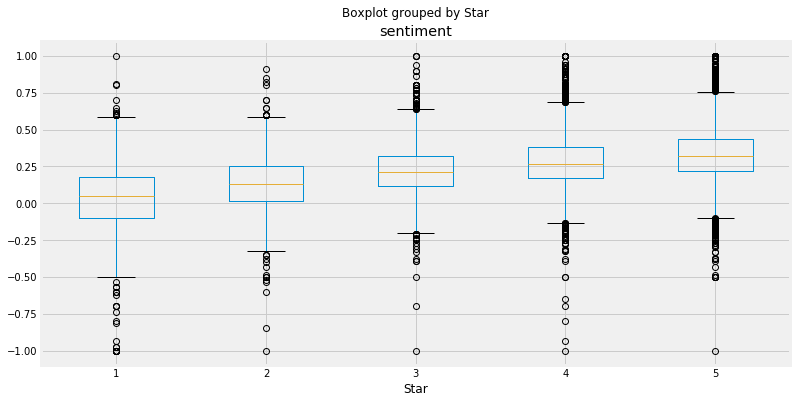

In [44]:
# Box plot of sentiment grouped by stars
df.boxplot(column='sentiment', by='Star', figsize=(13,6));

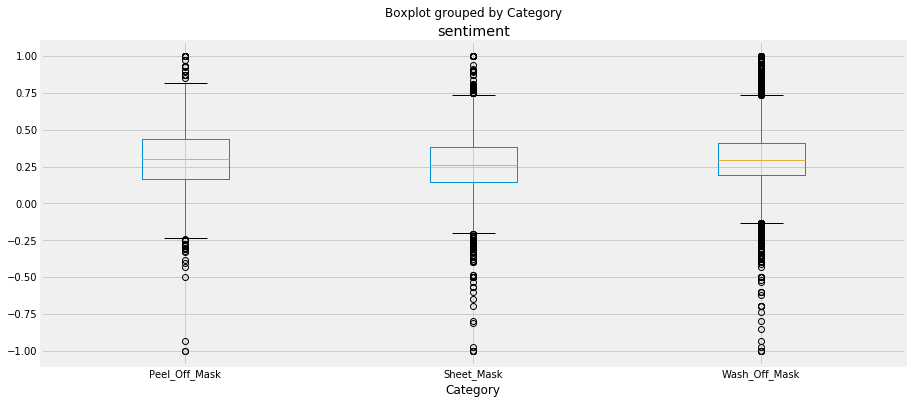

In [45]:
# Box plot of sentiment grouped by stars
df.boxplot(column='sentiment', by='Category', figsize=(15,6));

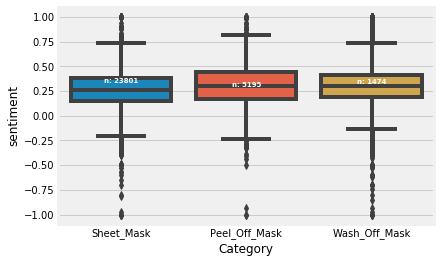

In [46]:
# library & dataset
import seaborn as sns, numpy as np

 
ax = sns.boxplot(x="Category", y="sentiment", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['Category'])['sentiment'].median().values
nobs = df['Category'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='x-small', color='w', weight='semibold')
 
    


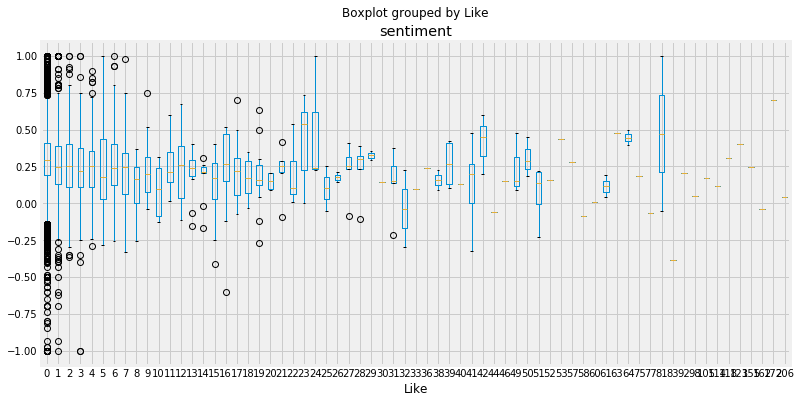

In [47]:
# Box plot of sentiment grouped by stars
df.boxplot(column='sentiment', by='Like', figsize=(13,6));

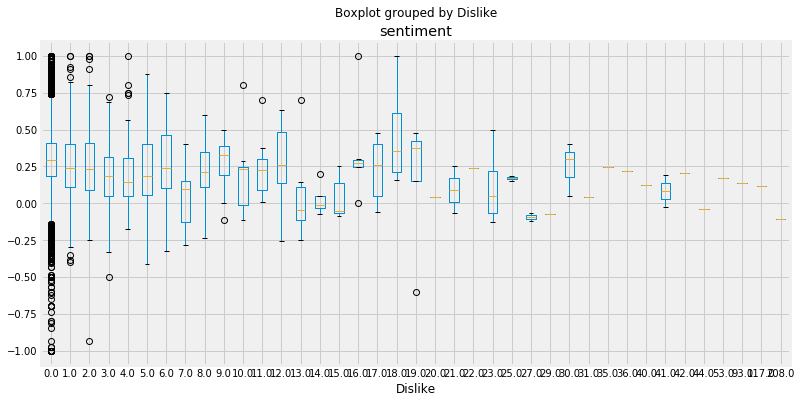

In [48]:
# Box plot of sentiment grouped by stars
df.boxplot(column='sentiment', by='Dislike', figsize=(13,6));

Of course, 5 Stars reviews have the highest polarity.

In [49]:
#text=df.text

In [62]:
# Widen the column display.
pd.set_option('max_colwidth', 50000)
pd.set_option('max_rows', 50000)

In [71]:
text=df.Text[(df.sentiment < 0.5) & (df.sentiment >= 0.25) & (df.Star==5)]
vect = TfidfVectorizer(stop_words='english')
ts=pd.DataFrame(vect.fit_transform(text).toarray(), columns=vect.get_feature_names()).T
ts.to_csv('wmt_review_5star_0.25positive.csv')


In [52]:
text=df.Text[(df.Category=="Wash_Off_Mask") & (df.Brand=="L'Oreal") & (df.Star==5) & (df.sentiment > 0.8) & (df.Like >= 1)]
vect = TfidfVectorizer(stop_words='english')
pd.DataFrame(vect.fit_transform(text).toarray(), columns=vect.get_feature_names()).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
ad,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.177778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ago,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.155233,0.000000,0.000000,0.000000,0.257211,0.000000,0.000000,0.000000,0.000000,0.000000
applied,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.294568,0.000000,0.000000,0.000000,0.000000,0.000000
area,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.262844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
asked,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.261176,0.000000,0.000000,0.000000,0.000000
awesome,0.000000,0.000000,0.000000,0.000000,0.000000,0.495566,0.340410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
beautiful,0.207741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
beauty,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.262844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
best,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116691,0.242603,0.409988,0.000000,0.193350,0.000000,0.000000,0.000000,0.000000,0.180071
blackheads,0.207741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [72]:
# Reviews with most positive sentiment with 5 Stars
ts_=df[(df.Star==5) & (df.sentiment >= 0.25)]
ts_.to_csv('wmt_reviews_5star_0.25positive.csv')

In [54]:
# Reviews with most positive sentiment with 1 Stars
df[(df.Star==1) & (df.sentiment == 1)]

,Category,Brand,Item,Retail Price,Title,Text,ID,Date,Month,Year,Year_Month,Star,Like,Dislike,sentiment
22146,Wash_Off_Mask,Biore,Biore Charcoal Self Heating One Minute Face Mask - 4 PK,$5.82,Very amazing,"Very good mask, would recommend to my friends/ family!! [This review was collected as part of a promotion.]",marissa_il_20168682,5/?28?/2018,5,2018,201805,1,0,0.0,1.0


In [55]:
# Reviews with most negative sentiment with 5 stars.
df[(df.Star==5) & (df.sentiment == -1)]

,Category,Brand,Item,Retail Price,Title,Text,ID,Date,Month,Year,Year_Month,Star,Like,Dislike,sentiment
19403,Wash_Off_Mask,Biore,Biore Charcoal Self Heating One Minute Face Mask - 4 PK,$5.82,Highly recommend,I like the fact that I never felt anything self heat an that it has charcoal an for the strips I like how they pull out the nasty gunk [This review was collected as part of a promotion.],vanessa_tx_18628928,6/?22?/2018,6,2018,201806,5,0,0.0,-1.0


In [56]:
# Reviews with most negative sentiment with 1 stars.
df[(df.Star==1) & (df.sentiment == -1)]

,Category,Brand,Item,Retail Price,Title,Text,ID,Date,Month,Year,Year_Month,Star,Like,Dislike,sentiment
4729,Sheet_Mask,FOUND_CLARIFYING,"FOUND CLARIFYING Red Clay Sheet Mask, 1 Single Use Mask",$2.50,Never Again!,This mask caused the WORST breakout on my face. I used it over a week ago and my skin is still trying to recover.,KittyMUA,1/?12?/2018,1,2018,201801,1,0,0.0,-1.0
5027,Sheet_Mask,FOUND_CLARIFYING,"FOUND CLARIFYING Red Clay Sheet Mask, 1 Single Use Mask",$2.50,Horrible Product,Horrible product,MTG808,1/?14?/2018,1,2018,201801,1,0,0.0,-1.0
5181,Sheet_Mask,Yes_To,"Yes To, Inc., Yes To Cucumbers 2-Step Single Use Eye Kit, 1 kit",$3.77,Burned my skin!!,"Worst product ever , not even 1 minute on my face and i felt tingling",Crystal,10/?16?/2018,10,2018,201810,1,0,0.0,-1.0
6199,Peel_Off_Mask,Biore,"Biore Deep Cleansing Pore Strips Combo Pack, 14 Count",$7.49,0,awful intended to return doesn't work wont stick,neenee35,6/?26?/2013,6,2013,201306,1,3,0.0,-1.0
13329,Wash_Off_Mask,L'Oreal,L'Oreal Paris Pure Clay Mask Detox & Brighten,$8.39,Never received,I'm very disappointed that I never received the product!,Madi3,8/?11?/2018,8,2018,201808,1,3,0.0,-1.0
21684,Wash_Off_Mask,Biore,Biore Charcoal Self Heating One Minute Face Mask - 4 PK,$5.82,worst,Biore self heating one minute mask was the worst thing i could have put on my face [This review was collected as part of a promotion.],mackenzie_ga_18660100,6/?11?/2018,6,2018,201806,1,0,0.0,-1.0
21753,Wash_Off_Mask,Biore,Biore Charcoal Self Heating One Minute Face Mask - 4 PK,$5.82,Did not work at all. False advertisement.,"Like said, it didn'twork at all. Gery horrible prod7ct. Would not ourchse again w [This review was collected as part of a promotion.]",sara_wi_18647509,6/?9?/2018,6,2018,201806,1,0,0.0,-1.0


In [57]:
# Reset the column display width.
pd.reset_option('max_colwidth')

For the purpose to find out best competitor's percevied key words from customers, it is desirable to use TF-IDF to Summarize Skincare Review with 5 Stars and Positive Polariey over 0.3

# Next Step 1

1) Develop a model to Score Words on 5 Star Reviews with Positive Polarity over 0.3.

2) Compare Score Words from 5 Star Reviews with Positive Polarity by each Brand competitor.

# Clustering

In [58]:
from IPython.display import Image
from IPython.core.display import HTML 

In [59]:
# Define X for clustering.
X1=df.dropna()
X1 = df.drop(['Category','Brand','Item','Retail Price','Title','Text','ID','Date','Month','Year'], axis=1)

X1.head()

,Year_Month,Star,Like,Dislike,sentiment
0,201712,5,0,0.0,0.750000
1,201711,5,0,0.0,0.377500
2,201712,5,1,0.0,0.391898
3,201801,5,0,0.0,0.550000
4,201711,5,0,0.0,0.400000


K-Means with 3 clusters

In [60]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Thus, trying to use 5-star only reviews in order to use smaller size for dtype..

In [ ]:
path1 = r'./data/Face_Mask_Review _5_Star_only.csv'
df2 = pd.read_csv(path1, encoding='ISO-8859-1')
df2['sentiment'] = df.Text.apply(detect_sentiment)
df2.head()

In [ ]:
# Define X for clustering.
X1=df2.dropna()
X1 = df2.drop(['Category','Brand','Item','Retail Price','Year','Month','Title','Text','ID','Date','Month','Year'], axis=1)

X1.head()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X1)

Review Cluster Labels.

In [ ]:
km.labels_

Save the cluster labels and sort by cluster.

In [ ]:
df2['cluster']=km.labels_
df2.sort_values('cluster', ascending=False)

Review Cluster Centers.

In [ ]:
km.cluster_centers_

Calculate the mean of each feature for each cluster.

In [ ]:
df2.groupby('cluster').mean()

Save the DataFrame of cluster centers.

In [ ]:
centers = df2.groupby('cluster').mean()

Allow plots to appear in the notebook.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Create a "colors" array for plotting.

In [ ]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

Scatter plot of Sentiment versus Like , colored by cluster (0=red, 1=green, 2=blue).

In [ ]:
plt.scatter(df2.sentiment, df2.Like, c=colors[df2.cluster], s=50);

# Cluster centers, marked by "+"
plt.scatter(df2.sentiment, centers.Like, linewidths=3, marker='+', s=300, c='black');

# Add labels.
plt.xlabel('sentiment')
plt.ylabel('Like')

In [ ]:
df2.sentiment.value_counts

In [ ]:
df2.Like.value_counts

In [ ]:
pd.scatter_matrix(X1, c=colors[df2.cluster],figsize=(10,10), s=100);

Try to repeat with Scaled Data

Center and scale the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

K-means with three clusters on scaled data

In [ ]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

In [ ]:
X_scaled

Save the cluster labels and sort by cluster.

In [ ]:
df2['cluster']=km.labels_
df2.sort_values('cluster')

Review the cluster centers.

In [ ]:
df2.groupby('cluster').mean()

In [ ]:
pd.scatter_matrix(X1, c=colors[df2.cluster],figsize=(10,10), s=100);

DBSCAN: Density-Based Clustering

DBSCAN with eps=1 and min_samples=3.

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)

Review Cluster Labels.

In [ ]:
db.labels_

Save the cluster labels and sort by cluster.

In [ ]:
df2['cluster'] = db.labels_
df2.sort_values('cluster')

Review Cluster Centers.

In [ ]:
df2.groupby('cluster').mean()

In [ ]:
pd.scatter_matrix(X1, c=colors[df2.cluster],figsize=(10,10), s=100);

DBSCAN is not appropriate model to cluster since it has too many clusters.

# Next Step 2

1) Try to develop individual Clustering by Brand or Sub-category.

2) Trey to develop clustering change by Brand or Sub-Category over time-series.